In [1]:
import sys
import requests
import json
import re
import time
import datetime
from datetime import date

import pandas as pd
import numpy as np


In [15]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap


In [2]:
numrecords = 1000

In [3]:
## Get data from taxicab api

url = 'https://data.cityofnewyork.us/id/2yzn-sicd.json?$limit=%s' %(numrecords)
resp = requests.get(url)
results = json.loads(resp.text)

In [4]:
# check that results brought back the expected number of records (should == numrecords)

len(results)

1000

In [5]:
## generate Trips DataFrame

TripsDF = pd.DataFrame(list(results))
TripsDF.head(3)


,dropoff_datetime,dropoff_latitude,dropoff_longitude,extra,fare_amount,mta_tax,passenger_count,payment_type,pickup_datetime,pickup_latitude,pickup_longitude,rate_code,store_and_fwd_flag,tip_amount,tolls_amount,total_amount,trip_distance,vendor_id
0,2015-06-15T12:57:18.000,40.763278961181641,-73.992828369140625,0,5.5,0.5,1,1,2015-06-15T12:52:34.000,40.756919860839844,-74.001388549804688,1,N,1.25,0,7.55,0.9,1
1,2015-05-18T20:24:08.000,40.752292633056641,-73.992881774902344,0.5,11,0.5,1,2,2015-05-18T20:09:18.000,40.731418609619141,-73.992179870605469,1,N,0,0,12.3,2.01,2
2,2015-02-13T09:14:26.000,40.752002716064453,-73.976936340332031,0,9.5,0.5,1,2,2015-02-13T09:00:35.000,40.755207061767578,-73.987709045410156,1,N,0,0,10.3,0.76,2


In [6]:
#Assigning correct datatypes
TripsDF["dropoff_datetime"] = pd.to_datetime(TripsDF["dropoff_datetime"],infer_datetime_format=True)
TripsDF["pickup_datetime"] = pd.to_datetime(TripsDF["pickup_datetime"],infer_datetime_format=True)
TripsDF["passenger_count"] = pd.to_numeric(TripsDF["passenger_count"])
TripsDF['trip_distance'] = TripsDF['trip_distance'].astype('float64')
TripsDF['pickup_latitude'] = TripsDF['pickup_latitude'].astype('float64') 
TripsDF['pickup_longitude'] = TripsDF['pickup_longitude'].astype('float64') 
TripsDF['dropoff_latitude'] = TripsDF['dropoff_latitude'].astype('float64') 
TripsDF['dropoff_longitude'] = TripsDF['dropoff_longitude'].astype('float64') 

In [7]:
odd = TripsDF.loc[TripsDF.pickup_longitude==0, ['pickup_longitude', 'pickup_latitude']]
odd
TripsDF= TripsDF.drop(odd.index)

In [8]:


l = []
k = []

q = []
r = []
s = []

t = []
u = []
v = []

for i in TripsDF.index:

    ## add dropoffinfo column to Trips dataframe:

    dropoff_latitude = TripsDF.loc[i, 'dropoff_latitude']
    dropoff_longitude = TripsDF.loc[i, 'dropoff_longitude']
    try:
        dropoff_url2 = "http://data.fcc.gov/api/block/find?format=json&latitude=%s&longitude=%s&showall=true" %(dropoff_latitude,dropoff_longitude)
        dropoff_resp2 = requests.get(dropoff_url2)
        dropoff_results2 = json.loads(dropoff_resp2.text)
        dropoffinfo = dropoff_results2["Block"]["FIPS"][2:11]
    except:
        dropffinfo="000000000"
            

    ## add pickupinfo column to Trips dataframe:
    
    pickup_latitude = TripsDF.loc[i, 'pickup_latitude']
    pickup_longitude = TripsDF.loc[i, 'pickup_longitude']
    try:
        pickup_url2 = "http://data.fcc.gov/api/block/find?format=json&latitude=%s&longitude=%s&showall=true" %(pickup_latitude,pickup_longitude)
        pickup_resp2 = requests.get(pickup_url2)
        pickup_results2 = json.loads(pickup_resp2.text)
        pickupinfo = pickup_results2["Block"]["FIPS"][2:11]
    except:
        pickupinfo="000000000"

    
    l.append(dropoffinfo)
    k.append(pickupinfo)


    try:
        dropofftract = dropoffinfo[3:9]
        dropoffcounty = dropoffinfo[0:3]
        pickuptract = pickupinfo[3:9]
        pickupcounty = pickupinfo[0:3]
        
        print(dropofftract,dropoffcounty,pickuptract,pickupcounty)

    #add pickup parameters

        tract = pickuptract
        county = pickupcounty

        ## pickup_pop
        try:
            variablename = "PCT0120001"
            url3 = "http://api.census.gov/data/2010/sf1?get=%s&for=tract:%s&in=state:36&in=county:%s&key=b0521cf638e6b5b2020031d032a0f0fad26d8678" %(variablename, tract, county) 
            resp3 = requests.get(url3)
            results3 = json.loads(resp3.text)
            pop = results3[1][0] 

            q.append(pop)
        except:
            q.append(None)

        ## pickup_male
        try:

            variablename = "PCT0120002"
            url3 = "http://api.census.gov/data/2010/sf1?get=%s&for=tract:%s&in=state:36&in=county:%s&key=b0521cf638e6b5b2020031d032a0f0fad26d8678" %(variablename, tract, county) 
            resp3 = requests.get(url3)
            results3 = json.loads(resp3.text)
            male = results3[1][0] 

            r.append(male)
        except:
            r.append(None)

        ## pickup_avghh
        try:
            variablename = "P0170001"
            url3 = "http://api.census.gov/data/2010/sf1?get=%s&for=tract:%s&in=state:36&in=county:%s&key=b0521cf638e6b5b2020031d032a0f0fad26d8678" %(variablename, tract, county) 
            resp3 = requests.get(url3)
            results3 = json.loads(resp3.text)
            avghh = results3[1][0] 

            s.append(avghh)
        except:
            s.append(None)
        
        #add dropoff parameters

        tract = dropofftract
        county = dropoffcounty

        ## dropoff_pop
        try:
            variablename = "PCT0120001"
            url3 = "http://api.census.gov/data/2010/sf1?get=%s&for=tract:%s&in=state:36&in=county:%s&key=b0521cf638e6b5b2020031d032a0f0fad26d8678" %(variablename, tract, county) 
            resp3 = requests.get(url3)
            results3 = json.loads(resp3.text)
            pop = results3[1][0] 

            t.append(pop)
        except:
            t.append(None)

        ## dropoff_male
        try:

            variablename = "PCT0120002"
            url3 = "http://api.census.gov/data/2010/sf1?get=%s&for=tract:%s&in=state:36&in=county:%s&key=b0521cf638e6b5b2020031d032a0f0fad26d8678" %(variablename, tract, county) 
            resp3 = requests.get(url3)
            results3 = json.loads(resp3.text)
            male = results3[1][0] 

            u.append(male)
        except:
            u.append(None)

        ## dropoff_avghh
        try:
            variablename = "P0170001"
            url3 = "http://api.census.gov/data/2010/sf1?get=%s&for=tract:%s&in=state:36&in=county:%s&key=b0521cf638e6b5b2020031d032a0f0fad26d8678" %(variablename, tract, county) 
            resp3 = requests.get(url3)
            results3 = json.loads(resp3.text)
            avghh = results3[1][0] 

            v.append(avghh)
        except:
            v.append(None)
    
    except:
        k.append(None)
        l.append(None)
        q.append(None)
        r.append(None)
        s.append(None)
        t.append(None)
        u.append(None)
        v.append(None)

    
TripsDF['pickupinfo'] = k
TripsDF['dropoffinfo'] = l

TripsDF['pickup_pop'] = q
TripsDF['pickup_male'] = r
TripsDF['pickup_avghh'] = s

TripsDF['dropoff_pop'] = t
TripsDF['dropoff_male'] = u
TripsDF['dropoff_avghh'] = v


####  with thanks to user on stackoverflow:
#### https://stackoverflow.com/questions/43750016/getting-specific-data-values-out-of-a-dataframe-python-pandas



012900 061 009900 061
010900 061 005900 061
009200 061 011300 061
015300 061 013300 061
009900 061 010200 061
006400 061 001800 061
123700 047 028700 047
012500 061 010400 061
007200 061 012100 061
013400 061 005600 061
003900 061 014000 061
009200 061 000900 061
015801 061 014900 061
001500 047 009400 061
012900 061 014900 061
018300 061 007400 061
003800 061 003300 061
013300 061 009900 061
011402 061 008800 061
012100 061 007000 061
012500 061 010900 061
005400 061 011300 061
011500 061 013900 061
133300 081 033100 081
004300 061 007200 061
014300 061 014300 061
010100 061 007700 061
008300 061 004800 061
009500 061 008000 061
002000 061 002900 061
009200 061 007800 061
006600 061 009000 061
007200 061 012000 061
012400 061 014300 061
012400 061 006300 061
016100 061 015601 061
015002 061 010200 061
011800 061 005800 061
011300 061 011300 061
049700 047 013100 061
004900 061 009900 061
024500 081 014200 061
011800 061 013800 061
001002 061 003601 061
005700 061 009600 061
001300 061

In [9]:
## scroll to the right to see the new Census data columns

TripsDF.head(3)

,dropoff_datetime,dropoff_latitude,dropoff_longitude,extra,fare_amount,mta_tax,passenger_count,payment_type,pickup_datetime,pickup_latitude,...,trip_distance,vendor_id,pickupinfo,dropoffinfo,pickup_pop,pickup_male,pickup_avghh,dropoff_pop,dropoff_male,dropoff_avghh
0,2015-06-15 12:57:18,40.763279,-73.992828,0,5.5,0.5,1,1,2015-06-15 12:52:34,40.756920,...,0.90,1,061009900,061012900,1945,1002,1.62,6038,3432,1.72
1,2015-05-18 20:24:08,40.752293,-73.992882,0.5,11,0.5,1,2,2015-05-18 20:09:18,40.731419,...,2.01,2,061005900,061010900,5401,2476,1.61,183,82,1.59
2,2015-02-13 09:14:26,40.752003,-73.976936,0,9.5,0.5,1,2,2015-02-13 09:00:35,40.755207,...,0.76,2,061011300,061009200,117,72,1.18,1806,882,1.48


In [12]:
#Assigning correct datatypes
TripsDF["dropoff_datetime"] = pd.to_datetime(TripsDF["dropoff_datetime"],infer_datetime_format=True)
TripsDF["pickup_datetime"] = pd.to_datetime(TripsDF["pickup_datetime"],infer_datetime_format=True)
TripsDF["passenger_count"] = pd.to_numeric(TripsDF["passenger_count"])
TripsDF['trip_distance'] = TripsDF['trip_distance'].astype('float64')
TripsDF['pickup_latitude'] = TripsDF['pickup_latitude'].astype('float64') 
TripsDF['pickup_longitude'] = TripsDF['pickup_longitude'].astype('float64') 
TripsDF['dropoff_latitude'] = TripsDF['dropoff_latitude'].astype('float64') 
TripsDF['dropoff_longitude'] = TripsDF['dropoff_longitude'].astype('float64')
TripsDF['Pickup_pop'] = TripsDF['pickup_pop'].astype('float64')
TripsDF['Pickup_male'] = TripsDF['pickup_male'].astype('float64')
TripsDF['Pickup_avghh'] = TripsDF['pickup_avghh'].astype('float64')
TripsDF['dropoff_pop'] = TripsDF['dropoff_pop'].astype('float64')
TripsDF['dropoff_male'] = TripsDF['dropoff_male'].astype('float64')
TripsDF['dropoff_avghh'] = TripsDF['dropoff_avghh'].astype('float64')

In [13]:
## scroll down to see the size of the data stored
TripsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 0 to 999
Data columns (total 29 columns):
dropoff_datetime      982 non-null datetime64[ns]
dropoff_latitude      982 non-null float64
dropoff_longitude     982 non-null float64
extra                 982 non-null object
fare_amount           982 non-null object
mta_tax               982 non-null object
passenger_count       982 non-null int64
payment_type          982 non-null object
pickup_datetime       982 non-null datetime64[ns]
pickup_latitude       982 non-null float64
pickup_longitude      982 non-null float64
rate_code             982 non-null object
store_and_fwd_flag    982 non-null object
tip_amount            982 non-null object
tolls_amount          982 non-null object
total_amount          982 non-null object
trip_distance         982 non-null float64
vendor_id             982 non-null object
pickupinfo            982 non-null object
dropoffinfo           982 non-null object
pickup_pop            982 non-null 

In [52]:
#finding female population
TripsDF["Pickup_female"]= TripsDF["Pickup_pop"] - TripsDF["Pickup_male"]
TripsDF["dropoff_female"]= TripsDF["dropoff_pop"] - TripsDF["dropoff_male"]

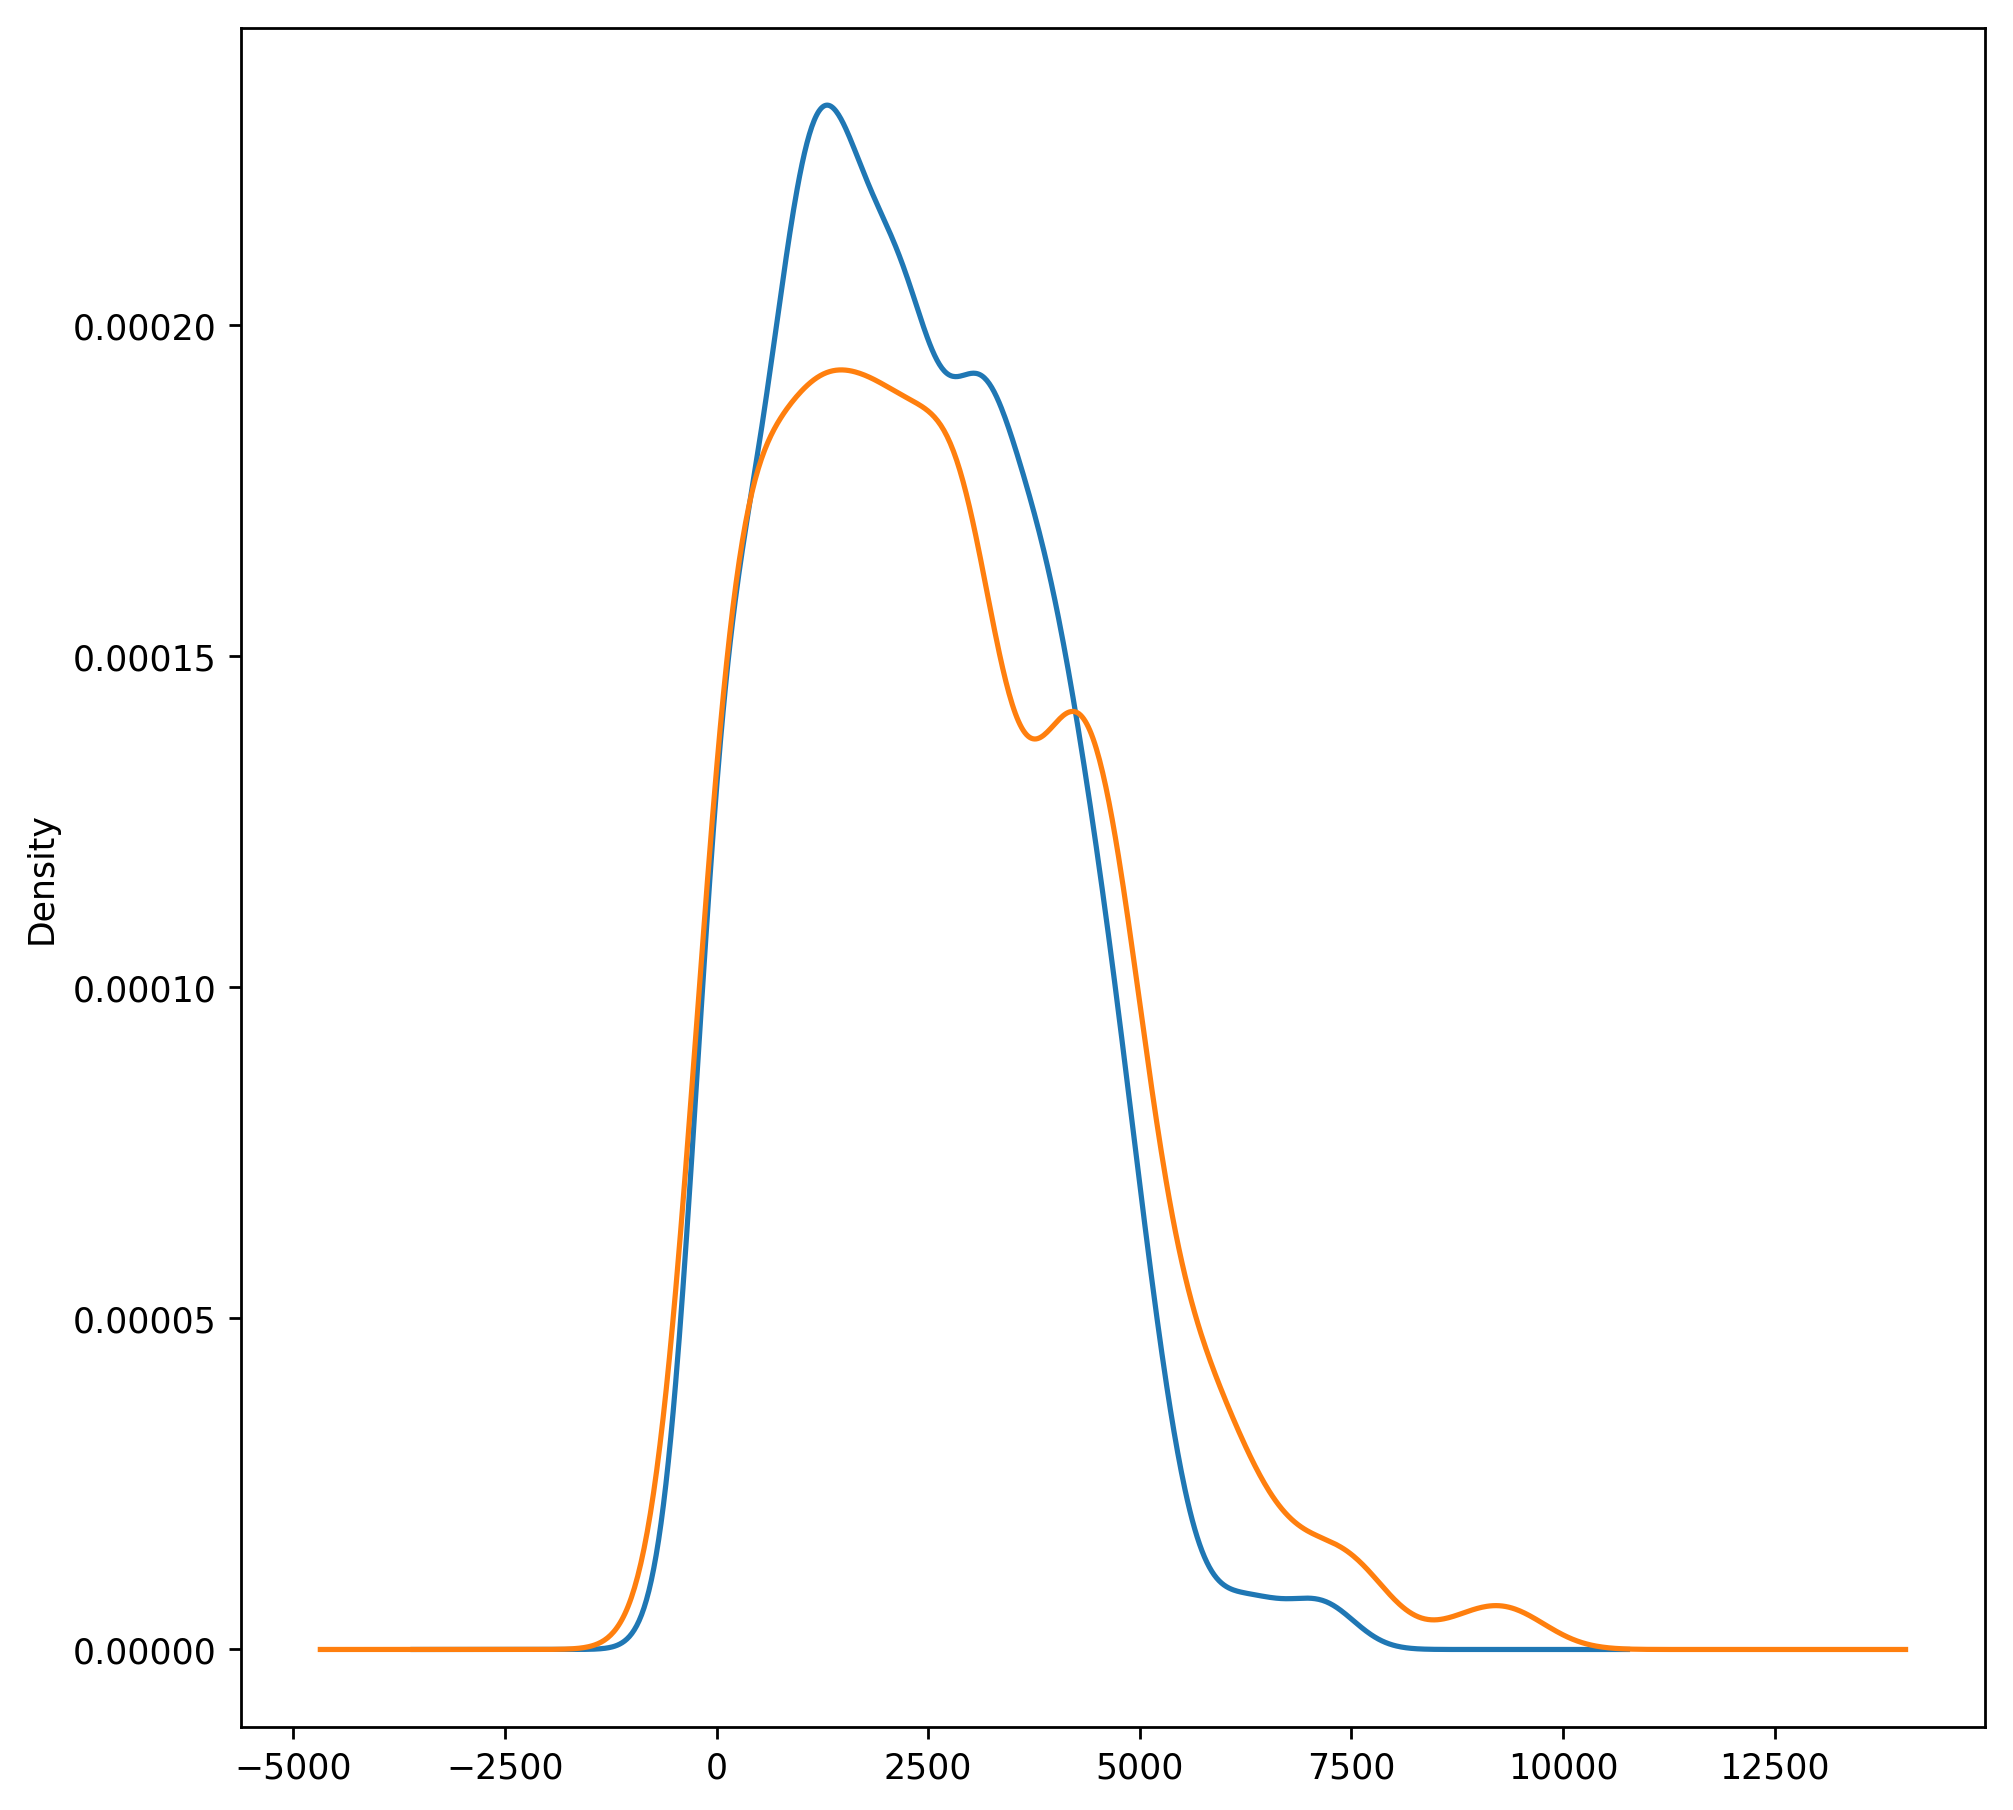

In [56]:
#comapring drop-off's male vs female
TripsDF["dropoff_male"].plot(kind='kde')
TripsDF["dropoff_female"].plot(kind='kde')
from matplotlib import rcParams  
rcParams['figure.figsize'] = (9,9) #Size of figure  

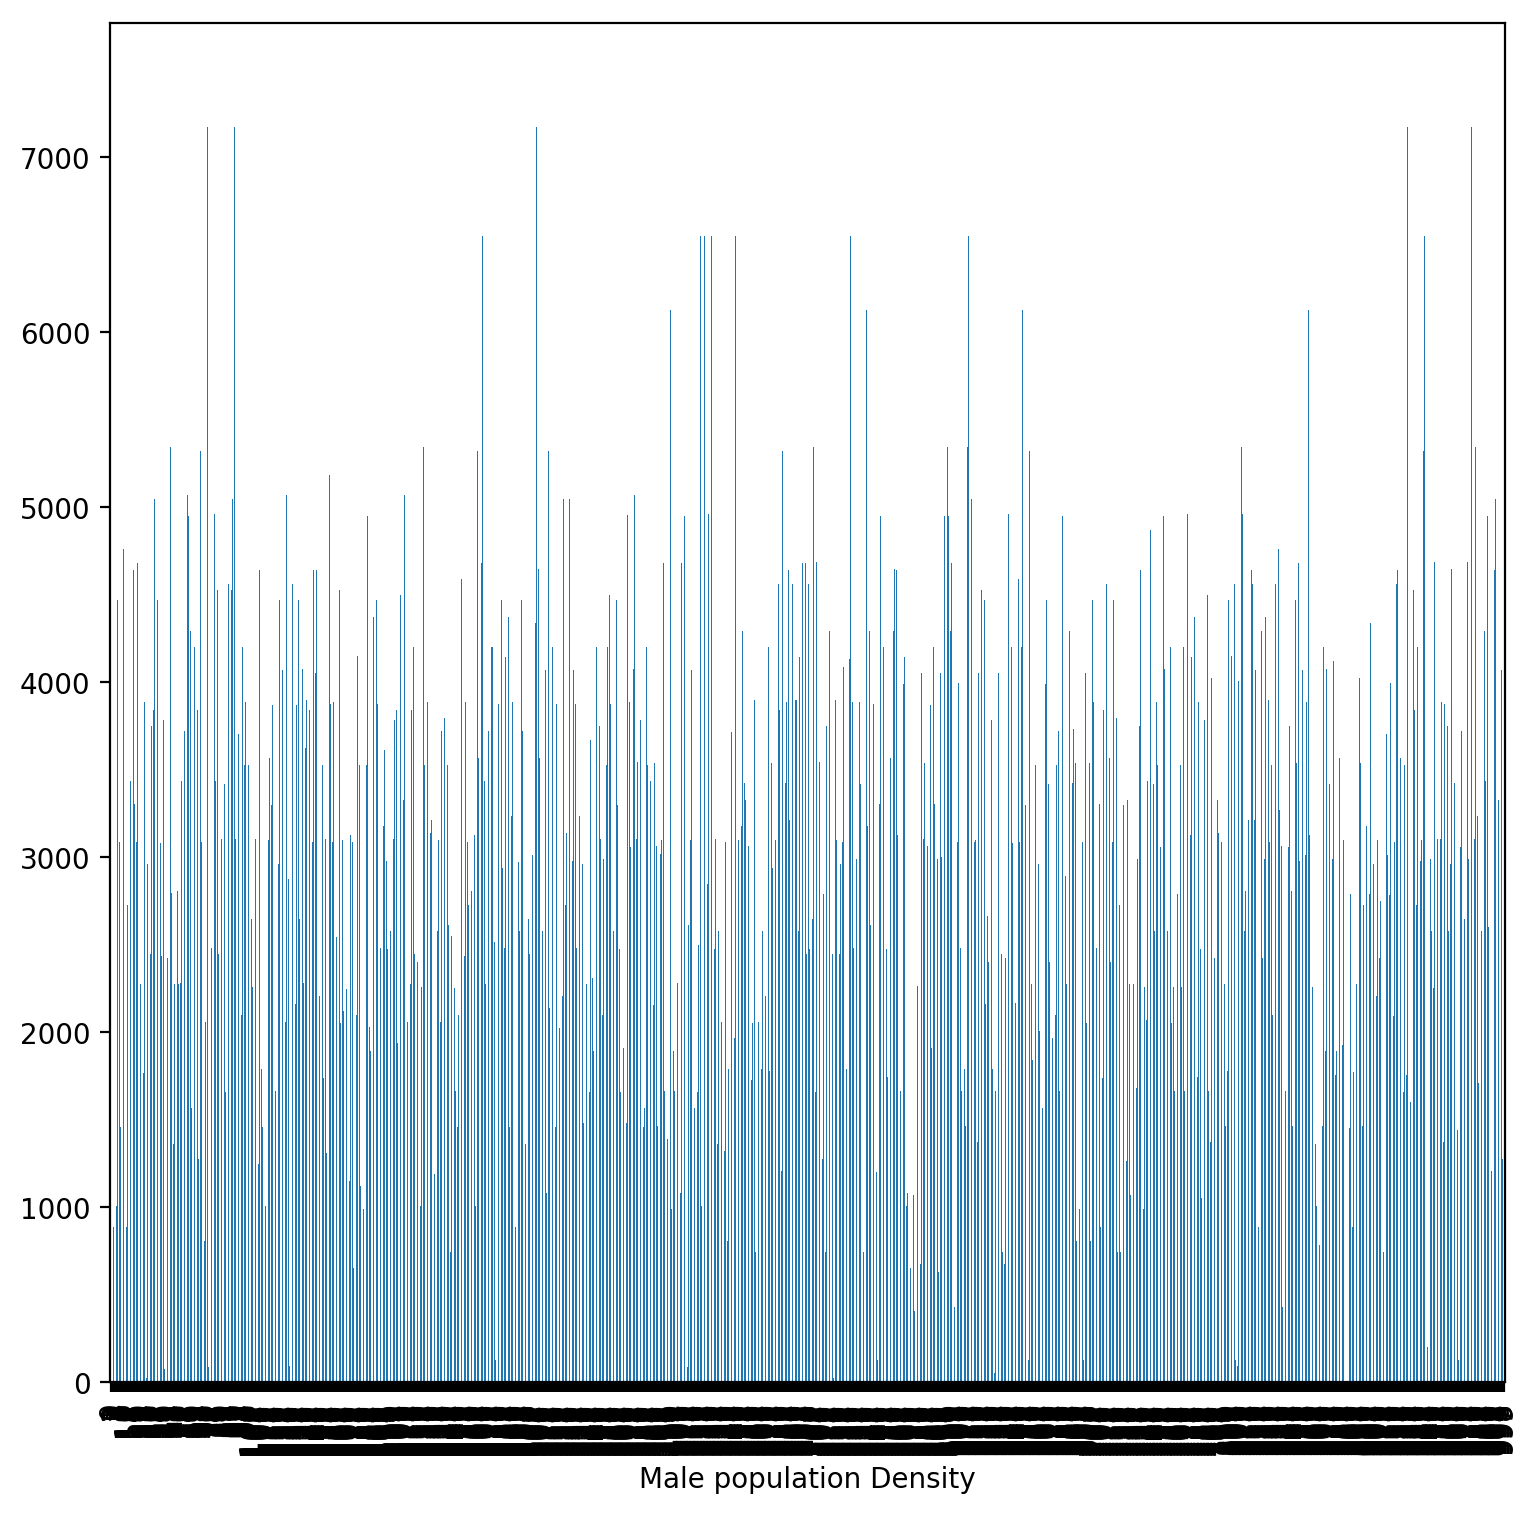

In [94]:
#male population density based on pick up and drop off locations
x=TripsDF["dropoff_male"]
y=TripsDF["Pickup_male"]
x.plot(kind='bar')
y.plot(kind='bar')
plt.xlabel("Male population Density")

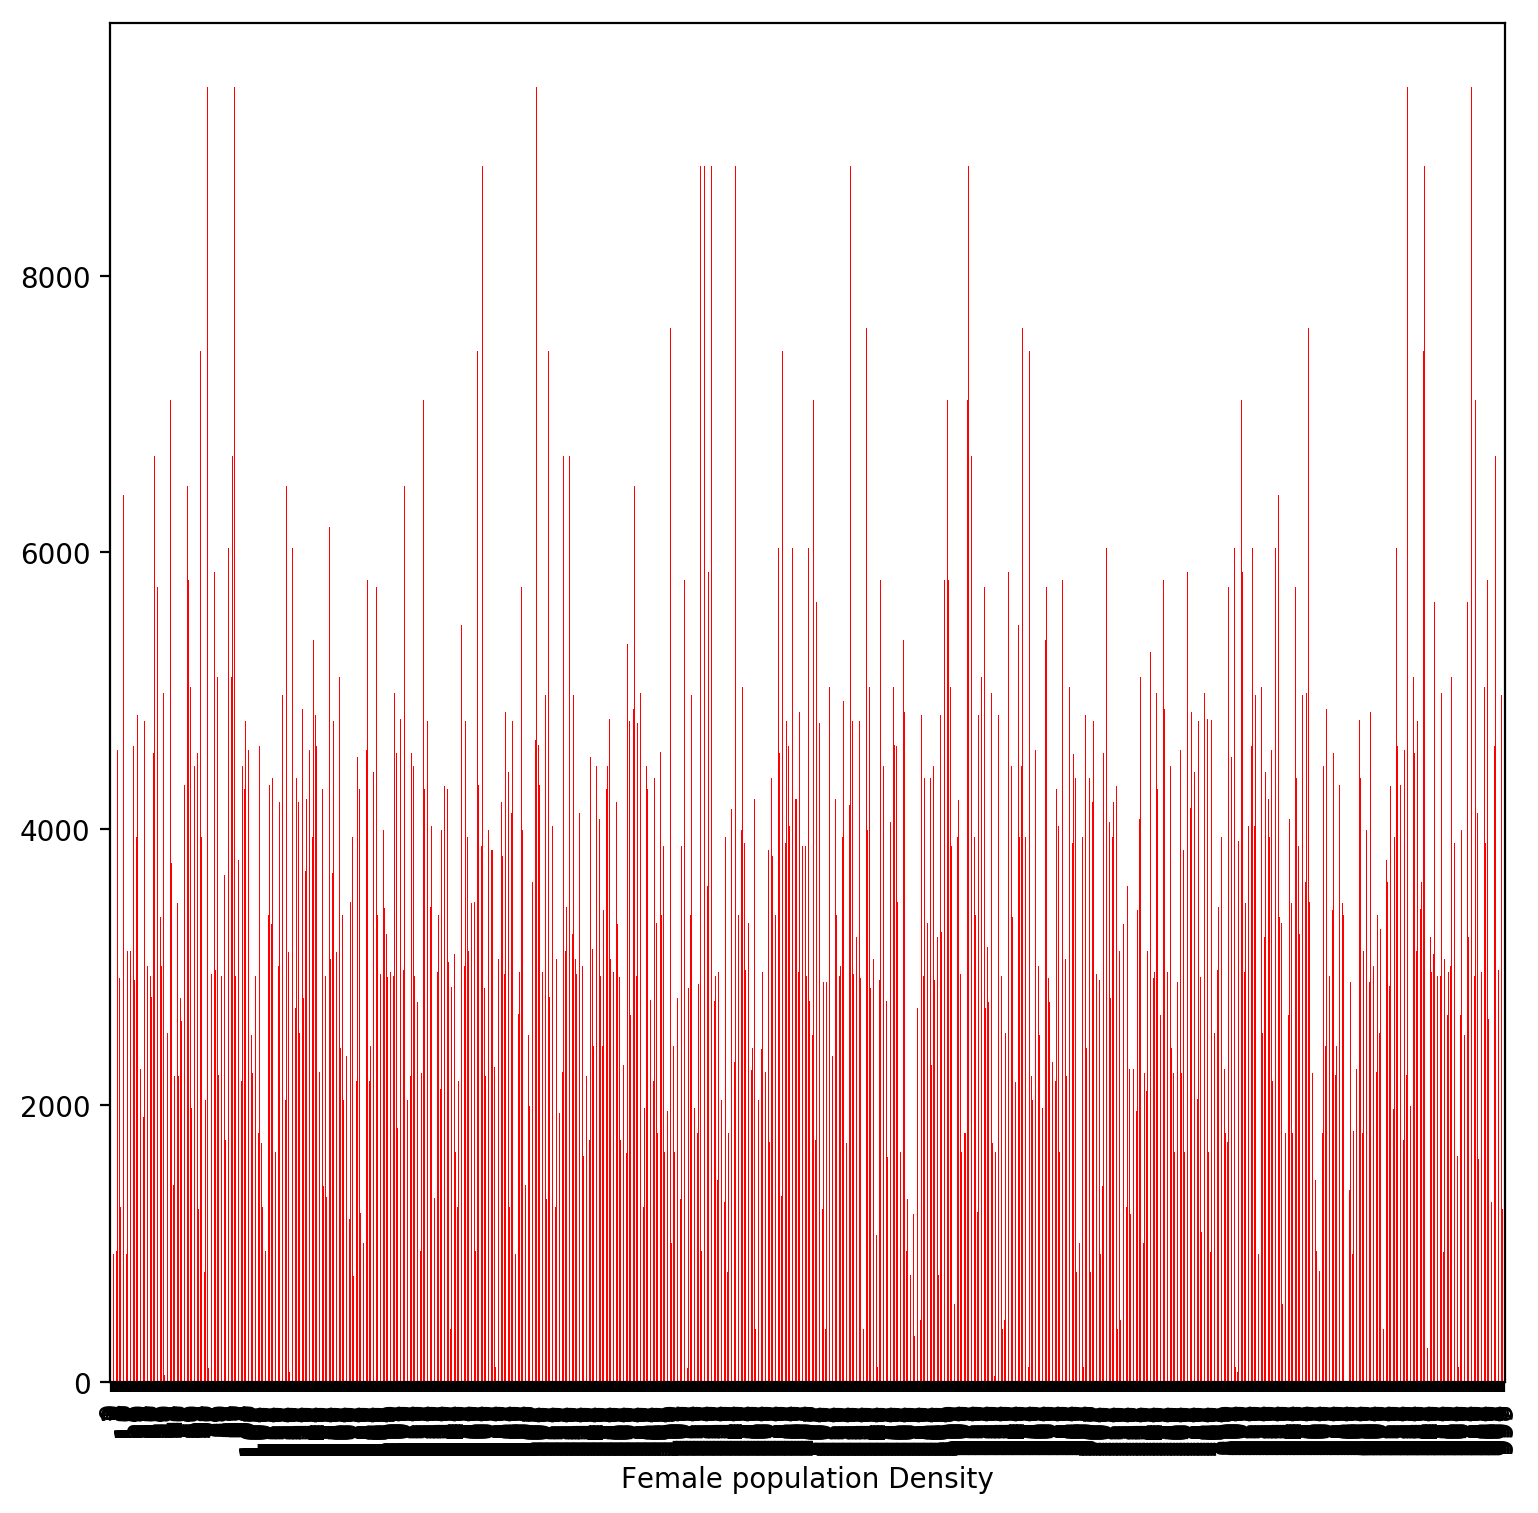

In [99]:
#female population density based on pick up an drop off locations
x=TripsDF["dropoff_female"]
y=TripsDF["Pickup_female"]
x.plot(kind='bar', color='red')
y.plot(kind='bar', color='red')
plt.xlabel("Female population Density")

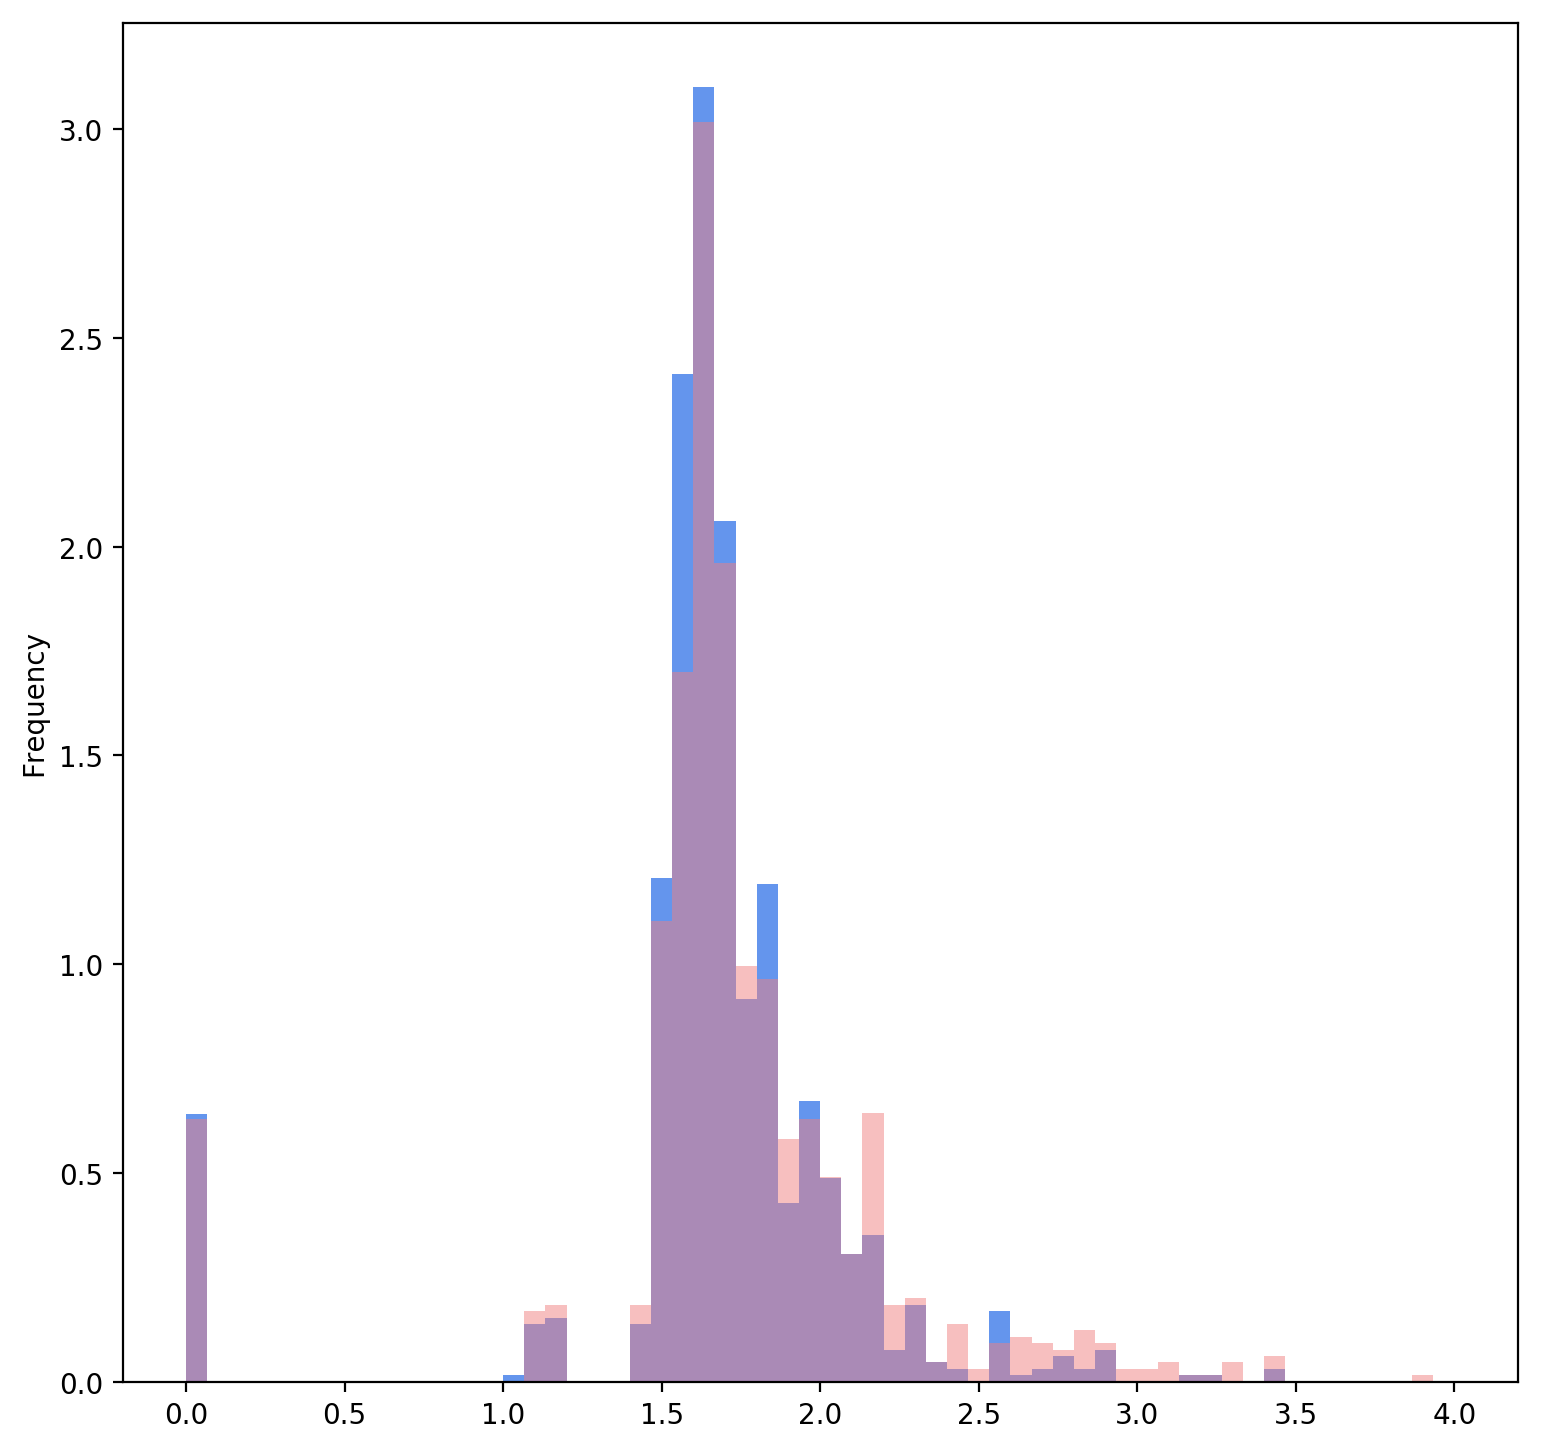

In [89]:
#Estimating the average household size
TripsDF["Pickup_avghh"].plot(kind = 'hist', bins=60, alpha=1, range=(0,4), color="#6495ED", normed=True)
#TripsDF["passenger_count"].plot(kind = 'hist', bins=50, range=(0,4), color='yellow', normed=True)
TripsDF["dropoff_avghh"].plot(kind = 'hist', bins=60, alpha=0.5, range=(0,4), color="#F08080", normed=True)

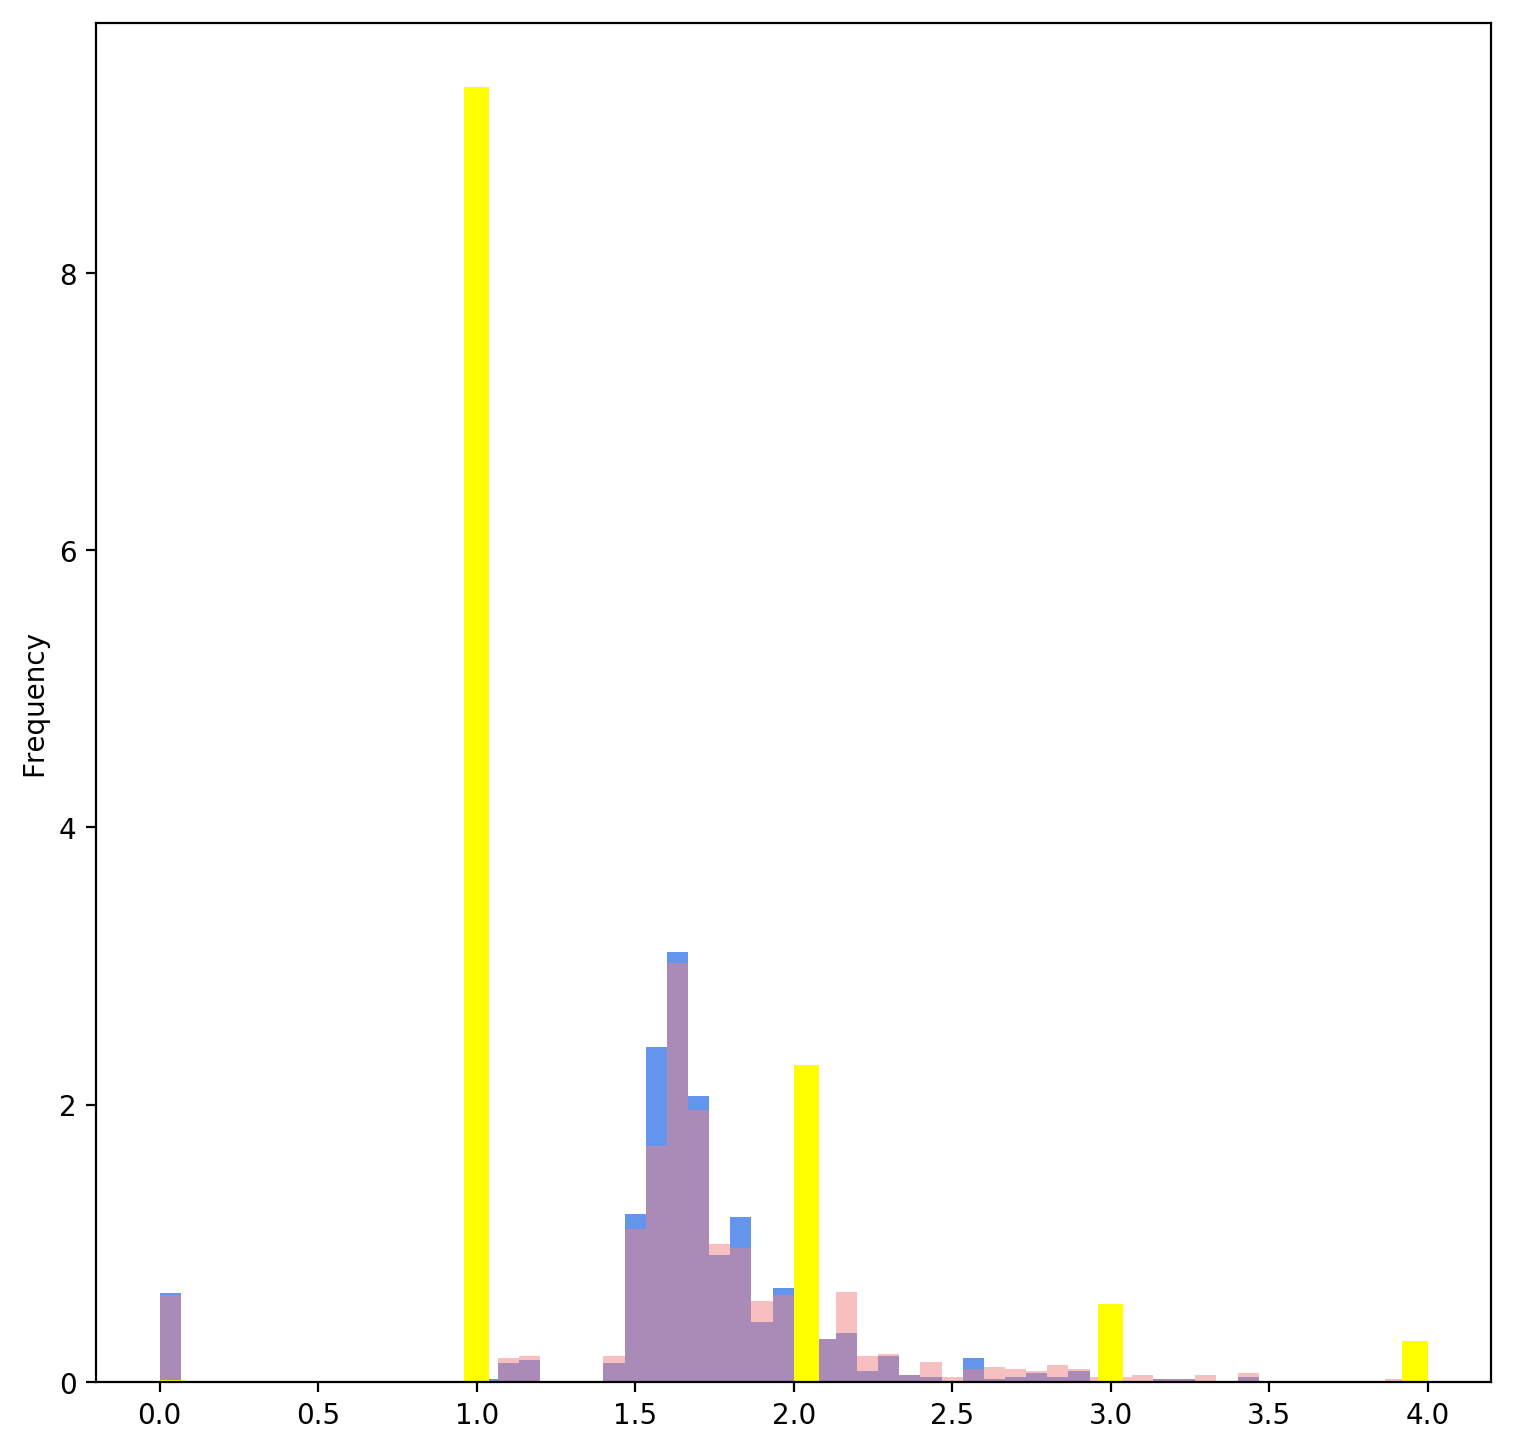

In [90]:
#passenger count based on household sizes
TripsDF["Pickup_avghh"].plot(kind = 'hist', bins=60, alpha=1, range=(0,4), color="#6495ED", normed=True)
TripsDF["dropoff_avghh"].plot(kind = 'hist', bins=60, alpha=0.5, range=(0,4), color="#F08080", normed=True)
TripsDF["passenger_count"].plot(kind = 'hist', bins=50, range=(0,4), color='yellow', normed=True)

#Need ideas to improve this visual

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


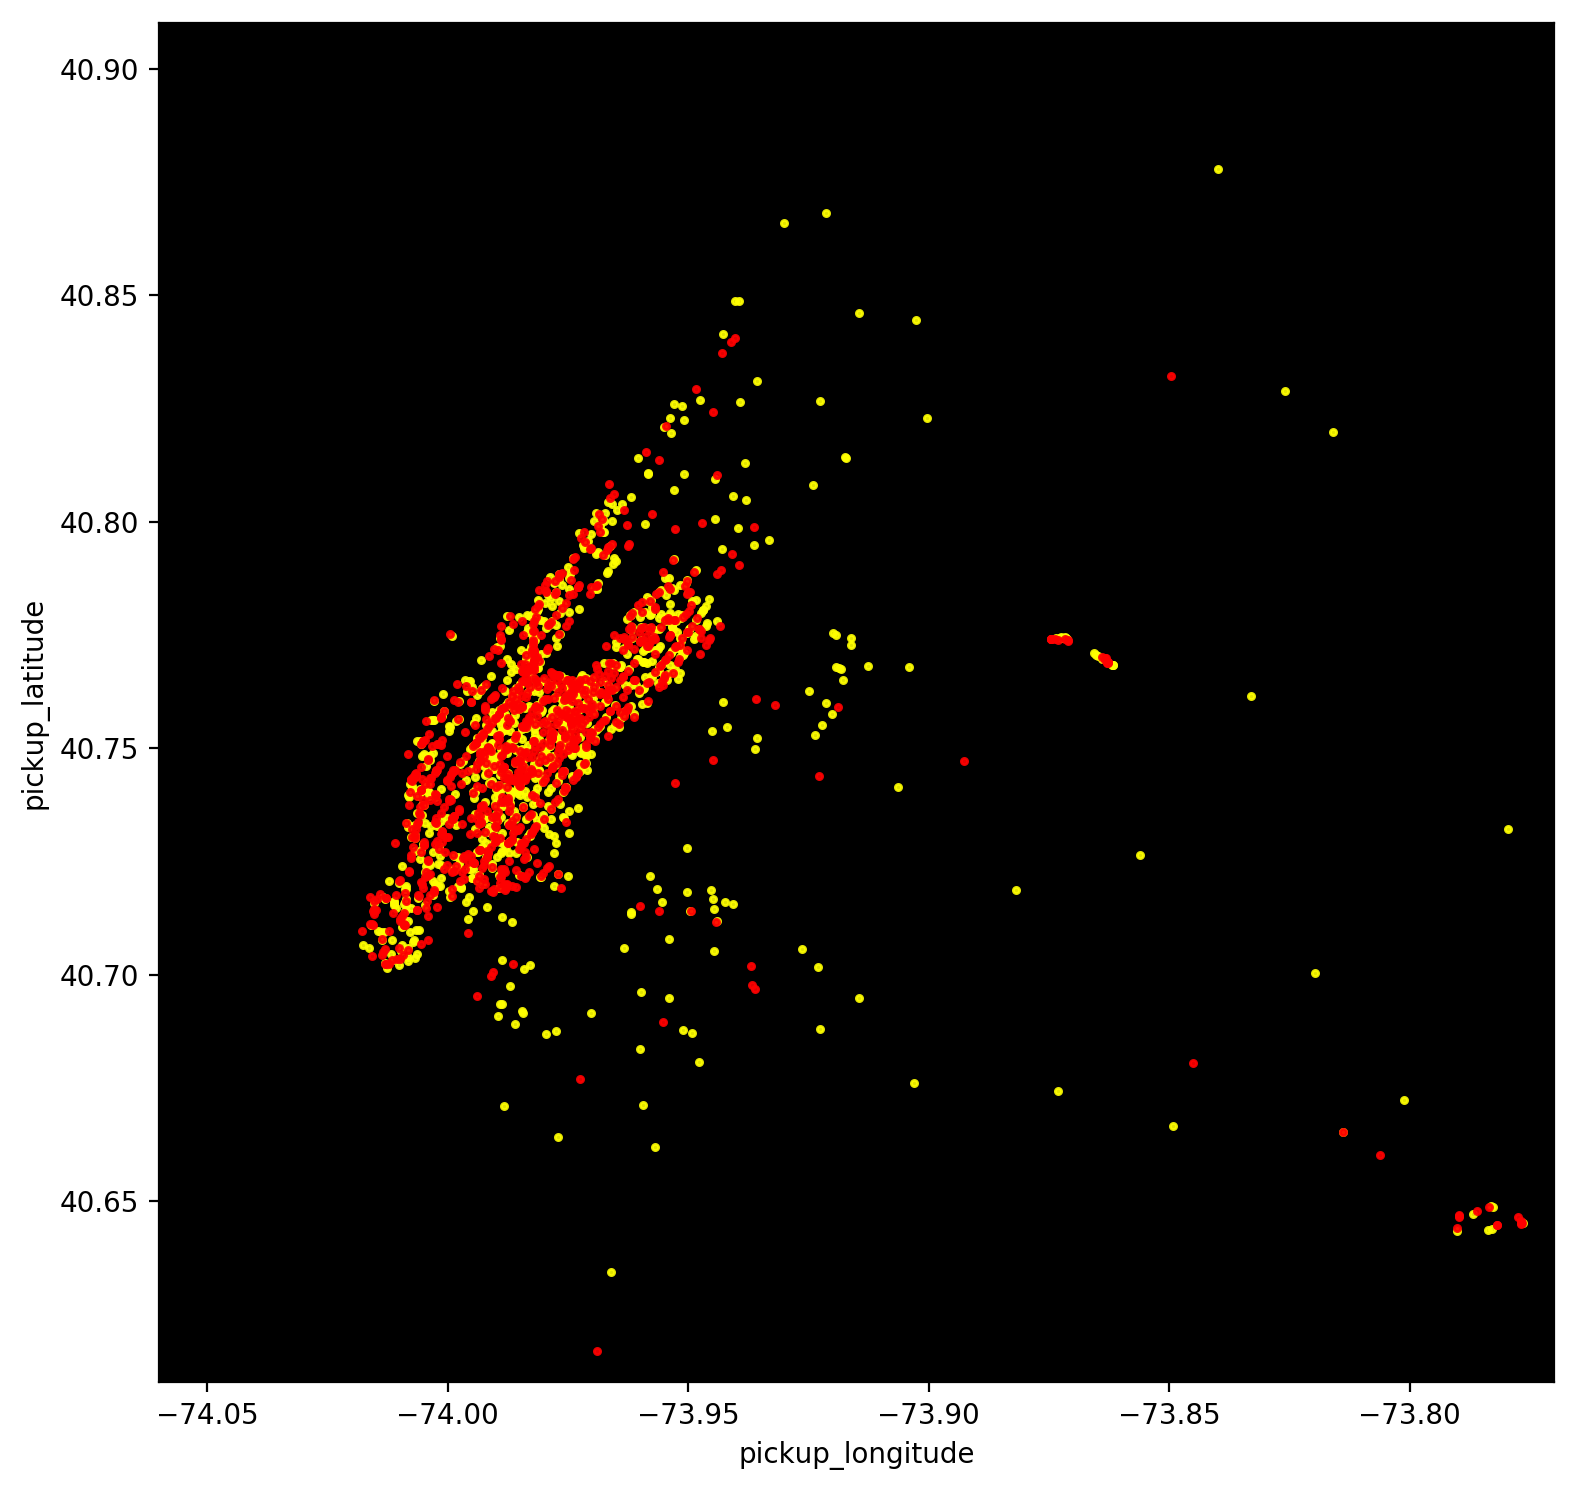

In [100]:
#plotting drop-offs and pick-ups based on location
firstplot = TripsDF.dropna().plot(kind='scatter', 
                        x='dropoff_longitude', 
                        y='dropoff_latitude',
                        xlim=(-74.06,-73.77),
                        ylim=(40.61, 40.91),
                        color='yellow',
                        s=5,alpha=.9)
secondplot = TripsDF.dropna().plot(kind='scatter', 
                        x='pickup_longitude', 
                        y='pickup_latitude',
                        xlim=(-74.06,-73.77),
                        ylim=(40.61, 40.91),
                        color='red',
                        s=5,alpha=.9,
                        ax= firstplot)

from matplotlib import rcParams  
rcParams['figure.figsize'] = (9,9) #Size of figure  
rcParams['figure.dpi'] = 200

firstplot.set_axis_bgcolor('black') #Background Color

#### with thanks to Daniel Forsyth
#### http://www.danielforsyth.me/mapping-nyc-taxi-data/